In [44]:
from sympy import *
import sympy
init_printing(use_latex=True)
from IPython.display import Image
Image(filename = "mass_spring.png", width=400)

# ばね‐質量系 ： 水平ばね振り子 

## 定数

- M : おもり（kg） 
- k : ばね定数
- c : ダンパー定数

ばね定数とは、ばねに作用する荷重と、ばねの変形量が正比例している関係を表した数値です。 単位は「N/mm」（ニュートン/ミリメータ）、「gf/mm」（グラム/ミリメータ）が小物ばねでは多く使われます。 1gのおもりを乗せた時に1mmばねが縮みます。

ダンパーはおもりの運動を抑制する抵抗力をおもりに加える役割を果たす．

In [45]:
# 定数を宣言し、値を代入
M, k, c = 10, 8, 5
M= sympy.sympify(M)
k= sympy.sympify(k)
c= sympy.sympify(c)


# 記号を定義する
x = Function('x') #位置
t = Symbol('t') #独立変数：時間（秒）

# 便宜上の変数
nu = c/M
omega = k/M

常微分方程式（ordinary differential equation，略してODE）を定義します。

In [46]:
v = x(t).diff(t,1)
a = x(t).diff(t,2)
ODE = sympy.Eq(a + omega*v + nu*x(t), 0)

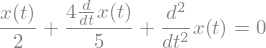

In [47]:
ODE

初期状態なしの一般の解

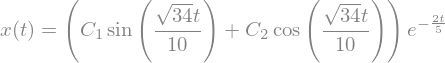

In [48]:
sympy.dsolve(ODE)

### 初期状態の設定

In [49]:
initial_conditions = {
    x(0) : 2, x(t).diff(t).subs(t, 0): -1} #初期状態の値
sol = dsolve(ODE, x(t), ics=initial_conditions)

## 初期状態を反映した解

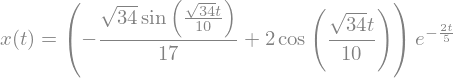

In [50]:
sol

In [51]:
der1 = sol.rhs.diff(t,1)# 一時微分＝速度
der2 = sol.rhs.diff(t,2)# 二時微分＝加速度

$\dot{x} = $

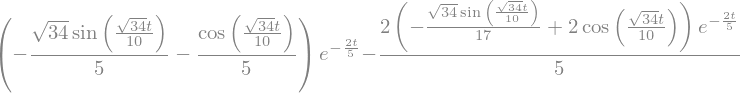

In [52]:
der1

$\ddot{x} = $

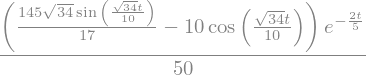

In [53]:
der2

今度は実行可能な関数を生成し、果をプロットします。

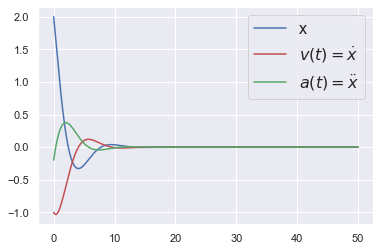

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import numpy
x = sympy.lambdify(t, sol.rhs, 'numpy')
xx = sympy.lambdify(t, der1, 'numpy')
xxx = sympy.lambdify(t, der2, 'numpy')
tt = numpy.linspace(0,50,1000)
plt.plot(tt, x(tt), 'b', label = 'x')
plt.plot(tt, xx(tt), 'r', label = '$v(t)=\dot{x}$')
plt.plot(tt, xxx(tt), 'g', label = '$a(t)=\ddot{x}$')
plt.legend(fontsize= 16)